# Telecom Customer Segmentation using K-Means

## 📦 Step 1: Load Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Load dataset
df = pd.read_csv('telco.csv')

## 🧹 Step 2: Preprocessing

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 40 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7032 non-null   int64  
 1   SeniorCitizen                            7032 non-null   int64  
 2   Partner                                  7032 non-null   int64  
 3   Dependents                               7032 non-null   int64  
 4   tenure                                   7032 non-null   int64  
 5   PhoneService                             7032 non-null   int64  
 6   PaperlessBilling                         7032 non-null   int64  
 7   MonthlyCharges                           7032 non-null   float64
 8   TotalCharges                             7032 non-null   float64
 9   MultipleLines_No                         7032 non-null   uint8  
 10  MultipleLines_No phone service           7032 no

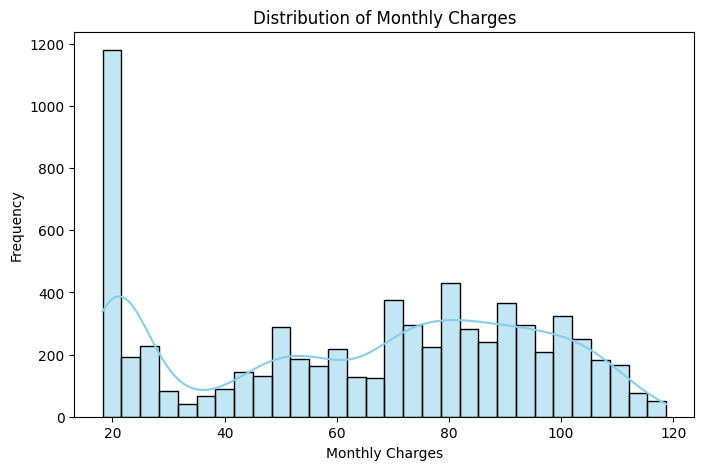

In [2]:
# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(subset=['TotalCharges'], inplace=True)

# Drop unnecessary columns
df.drop(['customerID', 'Churn'], axis=1, inplace=True)

# Encode binary variables
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0, 'Male': 0, 'Female': 1})

# One-hot encode categoricals
categorical_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                    'Contract', 'PaymentMethod']
df = pd.get_dummies(df, columns=categorical_cols)

# Scale the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Dataset structure
print(df.info())

# Histogram of Monthly Charges
plt.figure(figsize=(8, 5))
sns.histplot(df['MonthlyCharges'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.show()

## 📐 Step 3A: Elbow and Silhouette Method

c:\Users\Hp\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` expl

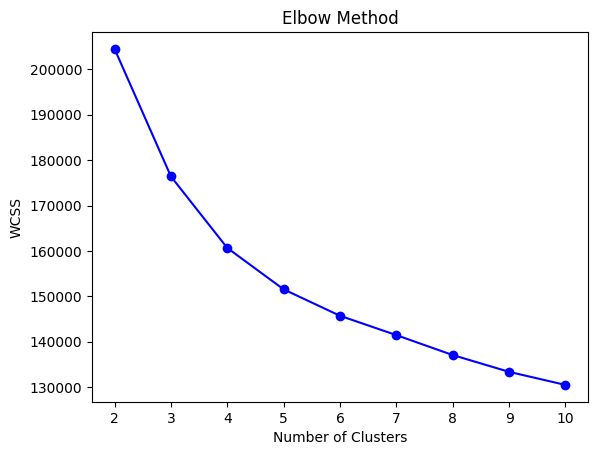

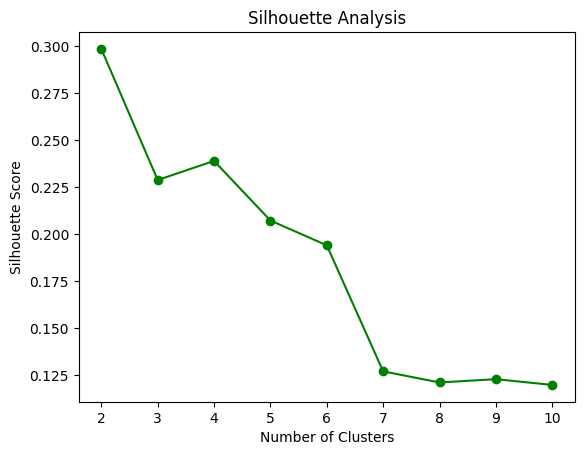

In [3]:
wcss = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data, labels))

plt.plot(K, wcss, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

plt.plot(K, silhouette_scores, 'go-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()

## 📐 Step 3B: Cluster Scatter Plot (PCA Projection)

c:\Users\Hp\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


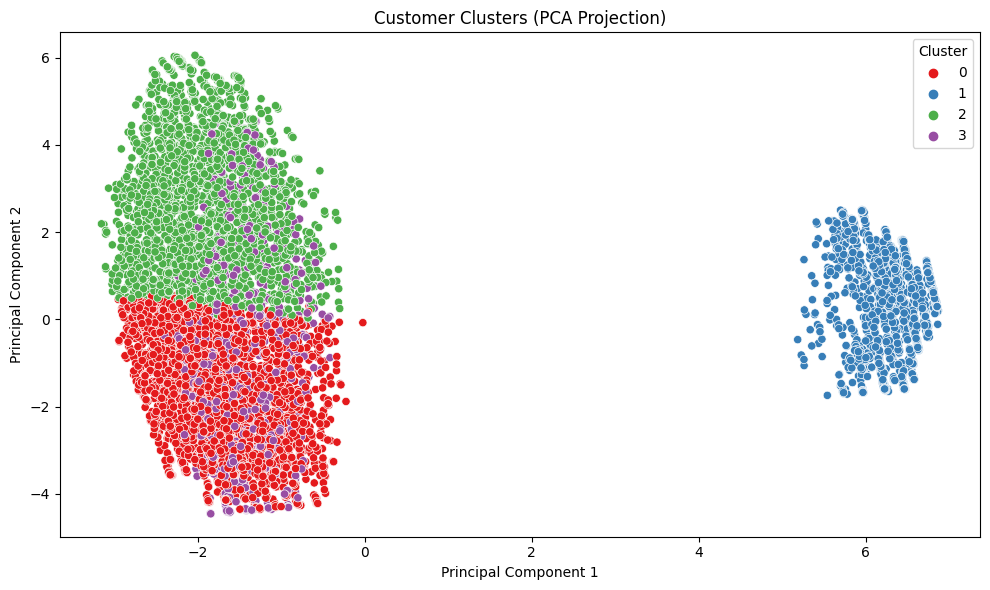

In [4]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 1: Apply KMeans if not already done
if 'Cluster' not in df.columns:
    kmeans = KMeans(n_clusters=4, random_state=42)
    df['Cluster'] = kmeans.fit_predict(scaled_data)

# Step 2: Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Step 3: Create DataFrame for plotting
pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = df['Cluster'].values  # Ensure clusters match rows

# Step 4: Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='Set1')
plt.title('Customer Clusters (PCA Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


## 📌 Step 4: Apply KMeans and Validate Stability

In [5]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Try different random states to test stability
for seed in [42, 10, 99]:
    km = KMeans(n_clusters=4, random_state=seed)
    labels = km.fit_predict(scaled_data)
    print(f"Silhouette Score for seed {seed}: {silhouette_score(scaled_data, labels):.4f}")

c:\Users\Hp\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for seed 42: 0.2390


c:\Users\Hp\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for seed 10: 0.2390


c:\Users\Hp\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for seed 99: 0.2390


## 🧠 Step 5: Cluster Profiling & Naming

In [6]:
# Add back important original columns for interpretation
original_df = pd.read_csv('telco.csv')
original_df['Cluster'] = df['Cluster']

# Cluster summary
profile = original_df.groupby('Cluster')[['tenure', 'MonthlyCharges', 'TotalCharges']].agg(['mean', 'median'])
print(profile)

            tenure        MonthlyCharges       
              mean median           mean median
Cluster                                        
0.0      16.484585     12      74.111806  75.40
1.0      30.667763     25      21.076283  20.15
2.0      55.075663     59      91.924771  94.90
3.0      31.830882     29      41.992500  40.55


## 📊 Step 6: Feature Charts by Cluster

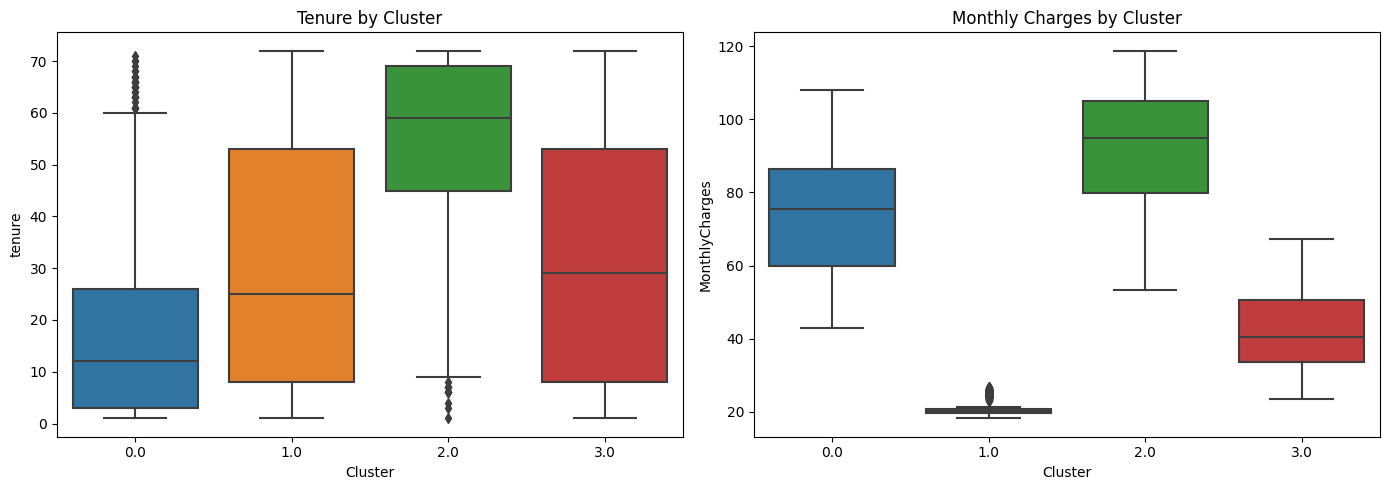

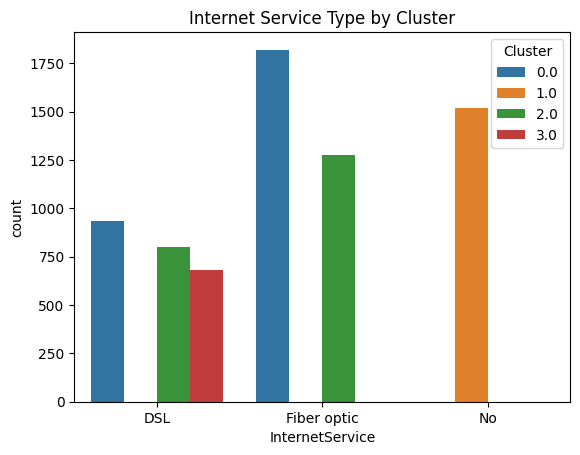

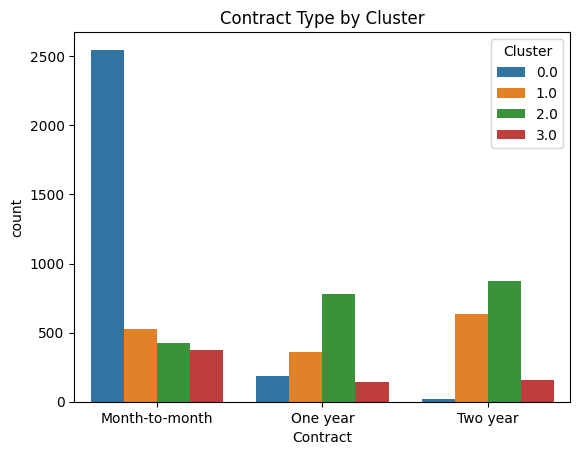

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
sns.boxplot(data=original_df, x='Cluster', y='tenure', ax=axs[0])
axs[0].set_title('Tenure by Cluster')
sns.boxplot(data=original_df, x='Cluster', y='MonthlyCharges', ax=axs[1])
axs[1].set_title('Monthly Charges by Cluster')
plt.tight_layout()
plt.show()

# InternetService type
sns.countplot(data=original_df, x='InternetService', hue='Cluster')
plt.title('Internet Service Type by Cluster')
plt.show()

# Contract type
sns.countplot(data=original_df, x='Contract', hue='Cluster')
plt.title('Contract Type by Cluster')
plt.show()

## 📈 Step 7: Why k=4?
> Based on the Elbow and Silhouette plots, k=4 was chosen because it balanced inertia minimization and cluster separation well while yielding actionable business segments.

## 🧾 Step 8: Business Recommendations
> **Cluster 0: Budget Newcomers**
- Offer loyalty rewards to improve retention
- Promote long-term contract discounts

> **Cluster 1: Loyal High-Value Users**
- Bundle premium services and upsell
- Early access to new features to maintain satisfaction

> **Cluster 2: Short-Term High Spenders**
- Identify churn risk—offer immediate discounts
- Emphasize value-added services to retain them

> **Cluster 3: Basic Plan Seniors**
- Provide tech support promotions
- Recommend basic bundles that meet their needs